In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
CSV_PATH = "StudentDetails_final.csv"        # 🔄 change to your file
df = pd.read_csv(CSV_PATH)

print("Initial shape:", df.shape)
df.head()

Initial shape: (6, 3)


,Name,Subject,Marks
0,AnitaSharma,Data Structures,85.0
1,RahulVerma,Digital Circuits,78.0
2,PriyaMenon,Thermodynamics,91.0
3,Varun Iyer,Fluid Mechanics,74.0
4,Divya Nair,Algorithms,95.0


In [23]:
missing = df.isna().sum()
display("Missing values per column:\n",missing)

'Missing values per column:\n'

Name       0
Subject    0
Marks      0
dtype: int64

In [24]:
df["Marks"] = df["Marks"].fillna(df["Marks"].median())
for col in ["Name", "Subject"]:
    mode_val = df[col].mode(dropna=True)
    if not mode_val.empty:
        df[col] = df[col].fillna(mode_val.iloc[0])

In [25]:
cols = ["Name", "Subject", "Marks"]
i = 0
while i < len(cols):
    col = cols[i]
    if col == "Marks":
        df[col].fillna(df[col].median(), inplace=True)
    else:
        mode_val = df[col].mode(dropna=True)
        if not mode_val.empty:
            df[col].fillna(mode_val.iloc[0], inplace=True)
    i += 1

In [27]:
Q1, Q3 = df["Marks"].quantile([0.25, 0.75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR

outlier_mask = (df["Marks"] < lower) | (df["Marks"] > upper)
print(f"Outliers detected: {outlier_mask.sum()} rows")

Outliers detected: 0 rows


In [28]:
STRATEGY = "winsorise"

if STRATEGY == "drop":
    df = df[~outlier_mask].reset_index(drop=True)
elif STRATEGY == "winsorise":
    df.loc[df["Marks"] < lower, "Marks"] = lower
    df.loc[df["Marks"] > upper, "Marks"] = upper
else:
    raise ValueError("STRATEGY must be 'drop' or 'winsorise'")

print("Shape after outlier handling:", df.shape)

Shape after outlier handling: (6, 3)


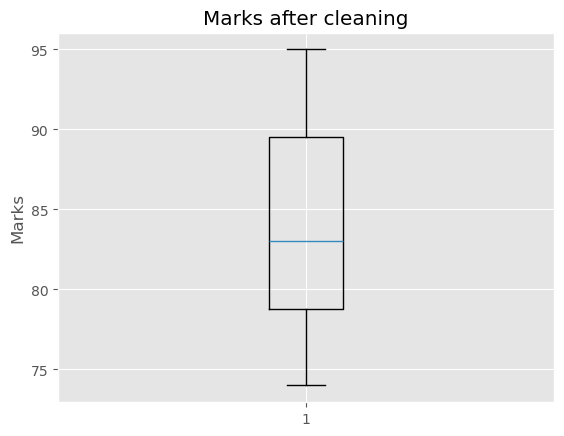

In [29]:
# ------------------------------------------------------------
# Cell 7 ── Quick visual check (optional)
# ------------------------------------------------------------
plt.boxplot(df["Marks"])
plt.title("Marks after cleaning")
plt.ylabel("Marks")
plt.show()


In [30]:
# ------------------------------------------------------------
# Cell 8 ── Save the cleaned file
# ------------------------------------------------------------
OUT_PATH = "StudentMarks_cleaned.csv"
df.to_csv(OUT_PATH, index=False)
print("✅ Cleaned data saved to", OUT_PATH)


✅ Cleaned data saved to StudentMarks_cleaned.csv
